In [ ]:
# !pip install tensorflow-gpu

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [1]:
!pip install --upgrade --no-cache-dir gdown

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-4.4.0-py3-none-any.whl size=14774 sha256=18bfa713ea6c6d10a5807e946999eb862d377740a940f299ad749dc22cf989a3
  Stored in directory: /tmp/pip-ephem-wheel-cache-mlm0ztz0/wheels/fb/c3/0e/c4d8ff8bfcb0461afff199471449f642179b74968c15b7a69c
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 4.2.2
    Uninstalling gdown-4.2.2:
      Successfully uninstalled gdown-4.2.2


In [2]:
# get train data

!gdown --id 1wMDnNeMfB77IYoxW3lPjkKPe4c5NnuS_

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1wMDnNeMfB77IYoxW3lPjkKPe4c5NnuS_
To: /content/setellite_car_pool.zip
100% 117M/117M [00:00<00:00, 162MB/s]


In [3]:
# extract train

!unzip '/content/setellite_car_pool.zip' -d '/content/images_train'

Streaming output truncated to the last 5000 lines.
  inflating: /content/images_train/training_data/training_data/images/000002499.jpg  
  inflating: /content/images_train/training_data/training_data/images/000002500.jpg  
  inflating: /content/images_train/training_data/training_data/images/000002501.jpg  
  inflating: /content/images_train/training_data/training_data/images/000002502.jpg  
  inflating: /content/images_train/training_data/training_data/images/000002503.jpg  
  inflating: /content/images_train/training_data/training_data/images/000002504.jpg  
  inflating: /content/images_train/training_data/training_data/images/000002505.jpg  
  inflating: /content/images_train/training_data/training_data/images/000002506.jpg  
  inflating: /content/images_train/training_data/training_data/images/000002507.jpg  
  inflating: /content/images_train/training_data/training_data/images/000002508.jpg  
  inflating: /content/images_train/training_data/training_data/images/000002509.jpg  
  i

In [4]:
!cd /content

In [5]:
!mkdir input

In [6]:
!mkdir input/train

In [7]:
!mkdir input/test

In [8]:
!cd /content/input

In [9]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET

def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     member[0].text,
                     int(float(member[1][0].text)),
                     int(float(member[1][1].text)),
                     int(float(member[1][2].text)),
                     int(float(member[1][3].text))
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df

In [10]:
dataset = xml_to_csv('/content/images_train/training_data/training_data/labels')

In [11]:
dataset

,filename,width,height,class,xmin,ymin,xmax,ymax
0,000000904.jpg,224,224,1,126,14,137,26
1,000002583.jpg,224,224,1,11,12,22,23
2,000000577.jpg,224,224,1,128,45,139,56
3,000000530.jpg,224,224,2,213,198,224,224
4,000000530.jpg,224,224,2,60,45,104,90
...,...,...,...,...,...,...,...,...
16167,000003042.jpg,224,224,1,168,124,179,135
16168,000000154.jpg,224,224,2,101,112,145,156
16169,000000154.jpg,224,224,2,38,29,82,74
16170,000000154.jpg,224,224,2,86,0,131,38


In [12]:
# import pandas as pd

column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
dataset_csv = pd.DataFrame(dataset, columns=column_name)

dataset_csv.iloc[0]

filename    000000904.jpg
width                 224
height                224
class                   1
xmin                  126
ymin                   14
xmax                  137
ymax                   26
Name: 0, dtype: object

In [13]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset_csv, test_size=0.15, random_state=0, stratify=dataset_csv['class'])

In [14]:
train['class'].value_counts()

1    11069
2     2677
Name: class, dtype: int64

In [15]:
test['class'].value_counts()

1    1953
2     473
Name: class, dtype: int64

In [16]:
import shutil
import os
  
source = "/content/images_train/training_data/training_data/images/"
destination = "/content/input/test/"

for f in test['filename']:
      # full = f.split('/')[1]
      print('test/'+f)
      shutil.copy(source + f, destination + f)
      # print((source + f, destination + f))


destination = "/content/input/train/"
for f in train['filename']:
    print('train/'+f)
    shutil.copy(source + f, destination)


Streaming output truncated to the last 5000 lines.
train/000002313.jpg
train/000003160.jpg
train/000003637.jpg
train/000000994.jpg
train/000003629.jpg
train/000003575.jpg
train/000003612.jpg
train/000002186.jpg
train/000002313.jpg
train/000003595.jpg
train/000003616.jpg
train/000003555.jpg
train/000003555.jpg
train/000000837.jpg
train/000003659.jpg
train/000000154.jpg
train/000001140.jpg
train/000003732.jpg
train/000002408.jpg
train/000003403.jpg
train/000002254.jpg
train/000001921.jpg
train/000001093.jpg
train/000000496.jpg
train/000003653.jpg
train/000001592.jpg
train/000001964.jpg
train/000003540.jpg
train/000003652.jpg
train/000000146.jpg
train/000003459.jpg
train/000000145.jpg
train/000003496.jpg
train/000002175.jpg
train/000002118.jpg
train/000003049.jpg
train/000000498.jpg
train/000000950.jpg
train/000000026.jpg
train/000000135.jpg
train/000003263.jpg
train/000001012.jpg
train/000003620.jpg
train/000001183.jpg
train/000003231.jpg
train/000003467.jpg
train/000001156.jpg
train/000

In [17]:
train.to_csv('/content/input/train.csv', index=None)
test.to_csv('/content/input/test.csv', index=None)

In [18]:
cd '/content'

/content


In [19]:
cp '/content/images_train/create_tfrecords.py' '/content/input'

In [20]:
cp '/content/images_train/exporter_main_v2.py' '/content/input'

In [21]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 70064, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 70064 (delta 1), reused 8 (delta 1), pack-reused 70055
Receiving objects: 100% (70064/70064), 578.33 MiB | 14.01 MiB/s, done.
Resolving deltas: 100% (49428/49428), done.


In [22]:
!mkdir 'output'

In [23]:
cd /content/input

/content/input


In [24]:
%set_env PYTHONPATH=/content/models/research:/content/models/research/slim

env: PYTHONPATH=/content/models/research:/content/models/research/slim


In [25]:
!python create_tfrecords.py --csv_input=/content/input/train.csv  --output_path=/content/output/train.record --image_dir=/content/input/train

Successfully created the TFRecords: /content/output/train.record


In [26]:
!python create_tfrecords.py --csv_input=/content/input/test.csv  --output_path=/content/output/test.record --image_dir=/content/input/test

Successfully created the TFRecords: /content/output/test.record


In [27]:
!touch '/content/output/custom.pbtxt'
with open('/content/output/custom.pbtxt', 'a') as the_file:

    the_file.write('item\n')
    the_file.write('{\n')
    the_file.write('id :{}'.format(int(1)))
    the_file.write('\n')
    the_file.write("name :'{}'".format(str('car')))
    the_file.write('\n')
    the_file.write('}\n')
    the_file.write('item\n')
    the_file.write('{\n')
    the_file.write('id :{}'.format(int(2)))
    the_file.write('\n')
    the_file.write("name :'{}'".format(str('pool')))
    the_file.write('\n')
    the_file.write('}\n')



In [28]:
cd '/content'

/content


In [29]:
cp '/content/models/research/object_detection/model_main_tf2.py' '/content/input'

In [45]:
ls

images_train/  input/  models/  output/  sample_data/  setellite_car_pool.zip


In [46]:
cd /content/models/research

/content/models/research


In [47]:
!protoc object_detection/protos/*.proto --python_out=.

In [49]:
cd /content/models/research

/content/models/research


In [50]:
cp object_detection/packages/tf2/setup.py .

In [51]:
!python -m pip install .

Processing /content/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 10.1 MB 5.2 MB/s 
     |████████████████████████████████| 352 kB 63.4 MB/s 
     |████████████████████████████████| 2.2 MB 54.9 MB/s 
     |████████████████████████████████| 23.4 MB 1.4 MB/s 
     |████████████████████████████████| 636 kB 59.0 MB/s 
     |████████████████████████████████| 4.9 MB 50.2 MB/s 
     |████████████████████████████████| 1.2 MB 59.9 MB/s 
     |████████████████████████████████| 47.8 MB 53 kB/s 
     |████████████████████████████████| 90 kB 12.0 MB/s 
     |████████████████████████████████| 234 kB 5

In [52]:
!pip install requests==2.23.0

     |████████████████████████████████| 58 kB 2.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
apache-beam 2.37.0 requires requests<3.0.0,>=2.24.0, but you have requests 2.23.0 which is incompatible.


In [53]:
!pip install folium==0.2.1

     |████████████████████████████████| 69 kB 2.3 MB/s 
  Created wheel for folium: filename=folium-0.2.1-py3-none-any.whl size=79808 sha256=7423d4035a5da2a4d18787c043e3cfed7b80621cf96c419a7f9b0bd38801818c
  Stored in directory: /root/.cache/pip/wheels/9a/f0/3a/3f79a6914ff5affaf50cabad60c9f4d565283283c97f0bdccf
Successfully built folium
  Attempting uninstall: folium
    Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3


In [54]:
!pip install dill==0.3.4

     |████████████████████████████████| 86 kB 2.7 MB/s 
  Attempting uninstall: dill
    Found existing installation: dill 0.3.1.1
    Uninstalling dill-0.3.1.1:
      Successfully uninstalled dill-0.3.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.37.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.4 which is incompatible.
apache-beam 2.37.0 requires requests<3.0.0,>=2.24.0, but you have requests 2.23.0 which is incompatible.


In [55]:
!pip install opencv-python==4.5.4.58

     |████████████████████████████████| 60.3 MB 1.2 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [56]:
!pip install imgaug==0.2.6

     |████████████████████████████████| 631 kB 2.5 MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.6-py3-none-any.whl size=654017 sha256=d77c4f651be8cae46faa9a2da5d469361c68a000ee3cbf349925d616f5479cd5
  Stored in directory: /root/.cache/pip/wheels/89/72/98/3ebfdba1069a9a8eaaa7ae7265cfd67d63ef0197aaee2e5f9c
Successfully built imgaug
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9


In [57]:
# From within TensorFlow/models/research/
!python object_detection/builders/model_builder_tf2_test.py

Running tests under Python 3.7.12: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2022-03-14 06:44:42.469743: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
W0314 06:44:42.832023 140439241582464 model_builder.py:1100] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 3.05s
I0314 06:44:43.084958 140439241582464 test_util.py:2374] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 3.05s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)): 0.61s
I0314 06:44:43.695013 140439241582464 test

In [58]:
mkdir /content/input/pre-trained-models

In [59]:
cd /content/input/pre-trained-models

/content/input/pre-trained-models


In [60]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

--2022-03-14 06:45:18--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 173.194.210.128, 2607:f8b0:400c:c0f::80
Connecting to download.tensorflow.org (download.tensorflow.org)|173.194.210.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M   109MB/s    in 0.2s    

2022-03-14 06:45:18 (109 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]



In [61]:
!tar -xvf ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz -C '/content/input/pre-trained-models'

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


In [62]:
cd /content/input

/content/input


In [63]:
mkdir /content/input/model

In [64]:
mkdir /content/input/model/ssd_mobilenet_v2_fpn

In [ ]:
cp '/content/images_train/pipeline.config' '/content/input/model/ssd_mobilenet_v2_fpn'

In [65]:
ls

create_tfrecords.py  model_main_tf2.py    test/     train/
model/               pre-trained-models/  test.csv  train.csv


In [66]:
cd /content/input

/content/input


In [ ]:
cd /content/input

/content/input


In [68]:
!python model_main_tf2.py --model_dir=/content/input/model/ssd_mobilenet_v2_fpn --pipeline_config_path=/content/input/model/ssd_mobilenet_v2_fpn/pipeline.config

2022-03-14 06:51:08.181066: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I0314 06:51:08.186645 139800524429184 mirrored_strategy.py:374] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: None
I0314 06:51:08.190579 139800524429184 config_util.py:552] Maybe overwriting train_steps: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0314 06:51:08.190717 139800524429184 config_util.py:552] Maybe overwriting use_bfloat16: False
Instructions for updating:
rename to distribute_datasets_from_function
W0314 06:51:08.216040 139800524429184 deprecation.py:343] From /content/models/research/object_detection/model_lib_v2.py:564: StrategyBase.experimental_distribute_

In [69]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/input/model/ssd_mobilenet_v2_fpn/pipeline.config --trained_checkpoint_dir /content/input/model/ssd_mobilenet_v2_fpn --output_directory /content/output/exported-model

2022-03-14 07:42:15.205716: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0314 07:42:15.450512 139668988180352 deprecation.py:615] From /usr/local/lib/python3.7/dist-packages/tensorflow/python/autograph/impl/api.py:458: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with back_prop=False is deprecated and will be removed in a future version.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
2022-03-14 07:42:30.287975: W ten

In [70]:
!zip -r /content/file.zip /content/output/exported-model

  adding: content/output/exported-model/ (stored 0%)
  adding: content/output/exported-model/pipeline.config (deflated 68%)
  adding: content/output/exported-model/checkpoint/ (stored 0%)
  adding: content/output/exported-model/checkpoint/checkpoint (deflated 41%)
  adding: content/output/exported-model/checkpoint/ckpt-0.index (deflated 80%)
  adding: content/output/exported-model/checkpoint/ckpt-0.data-00000-of-00001 (deflated 8%)
  adding: content/output/exported-model/saved_model/ (stored 0%)
  adding: content/output/exported-model/saved_model/variables/ (stored 0%)
  adding: content/output/exported-model/saved_model/variables/variables.index (deflated 78%)
  adding: content/output/exported-model/saved_model/variables/variables.data-00000-of-00001 (deflated 9%)
  adding: content/output/exported-model/saved_model/saved_model.pb (deflated 92%)
  adding: content/output/exported-model/saved_model/assets/ (stored 0%)


# **Testing the trained model** #

upload a test image to **/content** directory with name **test.jpg**

In [71]:
"""
Object Detection (On Image) From TF2 Saved Model
=====================================
"""

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
# import tensorflow as tf
import cv2
import argparse
from google.colab.patches import cv2_imshow

# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [73]:

# PROVIDE PATH TO MODEL DIRECTORY
PATH_TO_MODEL_DIR = '/content/output/exported-model'

# PROVIDE PATH TO LABEL MAP
PATH_TO_LABELS = '/content/output/custom.pbtxt'

# PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
MIN_CONF_THRESH = float(0.20)

In [74]:
# LOAD THE MODEL

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

print('Loading model...', end='')
start_time = time.time()

# LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

# LOAD LABEL MAP DATA FOR PLOTTING

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

Loading model...Done! Took 11.409207344055176 seconds


In [75]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings
training_data = []
def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.
    Args:
      path: the file path to the image
    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """

    # image = cv2.imread(path)
    # image =  cv2.resize(image, (320, 320), interpolation = cv2.INTER_CUBIC)
  
    # training_data.append(np.asarray(image))


    # training_data = np.reshape(training_data,(-1,320,
    #           320,3))
    # training_data = training_data.astype(np.float32)
    # training_data = training_data / 127.5 - 1.
    # return training_data[0]
    return np.array(Image.open(path))

In [76]:
IMAGE_PATHS = '/content/images_train/test_data_images/test_data_images/images/000002702.jpg'
print('Running inference for {}... '.format(IMAGE_PATHS), end='')

image = cv2.imread(IMAGE_PATHS)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

# input_tensor = np.expand_dims(image_np, 0)
detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_with_detections = image.copy()
print()
detections['detection_scores'][:5]

Running inference for /content/images_train/test_data_images/test_data_images/images/000002702.jpg... 


array([0.3801182 , 0.33826035, 0.2987905 , 0.21211438, 0.18964098],
      dtype=float32)

Done


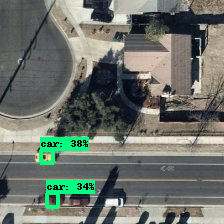

In [77]:


# SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=2,
      min_score_thresh=0.1,
      agnostic_mode=False)

print('Done')
# DISPLAYS OUTPUT IMAGE
cv2_imshow(image_with_detections)
# CLOSES WINDOW ONCE KEY IS PRESSED

In [84]:
IMAGE_PATHS = '/content/images_train/test_data_images/test_data_images/images/000000099.jpg'
print('Running inference for {}... '.format(IMAGE_PATHS), end='')

image = cv2.imread(IMAGE_PATHS)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

# input_tensor = np.expand_dims(image_np, 0)
detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_with_detections = image.copy()
print()
detections['detection_scores'][:5]

Running inference for /content/images_train/test_data_images/test_data_images/images/000000099.jpg... 


array([0.15879533, 0.14731477, 0.14608435, 0.12566723, 0.11500457],
      dtype=float32)

Done


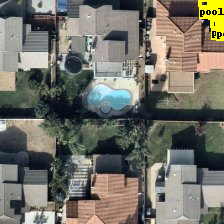

In [85]:


# SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=10,
      min_score_thresh=0.1,
      agnostic_mode=False)

print('Done')
# DISPLAYS OUTPUT IMAGE
cv2_imshow(image_with_detections)
# CLOSES WINDOW ONCE KEY IS PRESSED